In [67]:
require(readr)
require(dplyr)
require(ggplot2)
require(RColorBrewer)
require(showtext)
showtext_auto()

Loading required package: showtext

Loading required package: sysfonts

Loading required package: showtextdb



In [7]:
data = read_csv("../../data/constructicon/eval_onto_annot_concate.csv")


-- Column specification ----------------------------------------------------------------------------------------------------------
cols(
  attribute = col_character(),
  candidate = col_character(),
  polarity = col_double(),
  relatedness = col_double()
)




[1]   6  59  60  68  69   7   8   9  66  71  72  73  62  63  64  75   1   2
 [19]   3   4   5  61  67  50  51  52  53  54  55  56  57  77  65  58  74  10
 [37]  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
 [55]  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
 [73]  47  48  49  70  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 151  76 150 142 143
[145] 144 145 146 147 148 149 152 153 154 155 156 157 158 159  78

In [130]:
png("h:/eval_onto.png", 800,4000,res=150)
tab = xtabs(relatedness~candidate+attribute, 
      data %>% group_by(candidate, attribute) %>% 
      summarise(relatedness=floor(mean(relatedness)), .groups="drop"))
# hc = hclust(dist(tab))
# tab = tab[rev(hc$order), ]
tab = tab[order(apply(tab, 1, sum)), ]
col_size = apply(tab, 2, function(x){sum(x!=0)})
col_size_mat = t(apply(tab, 1, function(x){x[x!=0] = col_size[which(x!=0)]; x}))
row_order = order(apply(col_size_mat, 1, sum))
tab = tab[, order(-apply(tab, 2, function(x){length(which(x!=0))}))]
tab = tab[row_order, ]
# tab = tab[order(apply(tab, 1, function(x){min(which(x==0))})),]
# tab[tab==0] = 3
ggplot(as.data.frame(tab), aes(x=attribute, y=candidate, fill=Freq)) + 
    geom_tile() +
    scale_fill_gradientn(colors=brewer.pal(8, 'Reds')) + 
    scale_x_discrete(position="top")+
    labs(x="", y="")+
    theme(text=element_text(size=20), 
          legend.position="none",
          axis.text.x=element_text(angle=90, hjust=0))
dev.off()

png 
  2

In [135]:
tab2

[通訊]涵蓋         [通訊]網速         [其他]客服         [通訊]頻段 
                 3                  0                  0                  0 
    [加值]國際漫遊   [資費]低資費方案     [資費]續約攜碼       [加值]vowifi 
                 0                  0                  0                  0 
    [加值]影音娛樂      [加值]電信APP         [通訊]限速         [其他]固網 
                 0                  0                  0                  0 
[通訊]國內電信漫遊     [資費]方案活動 
                 0                  0

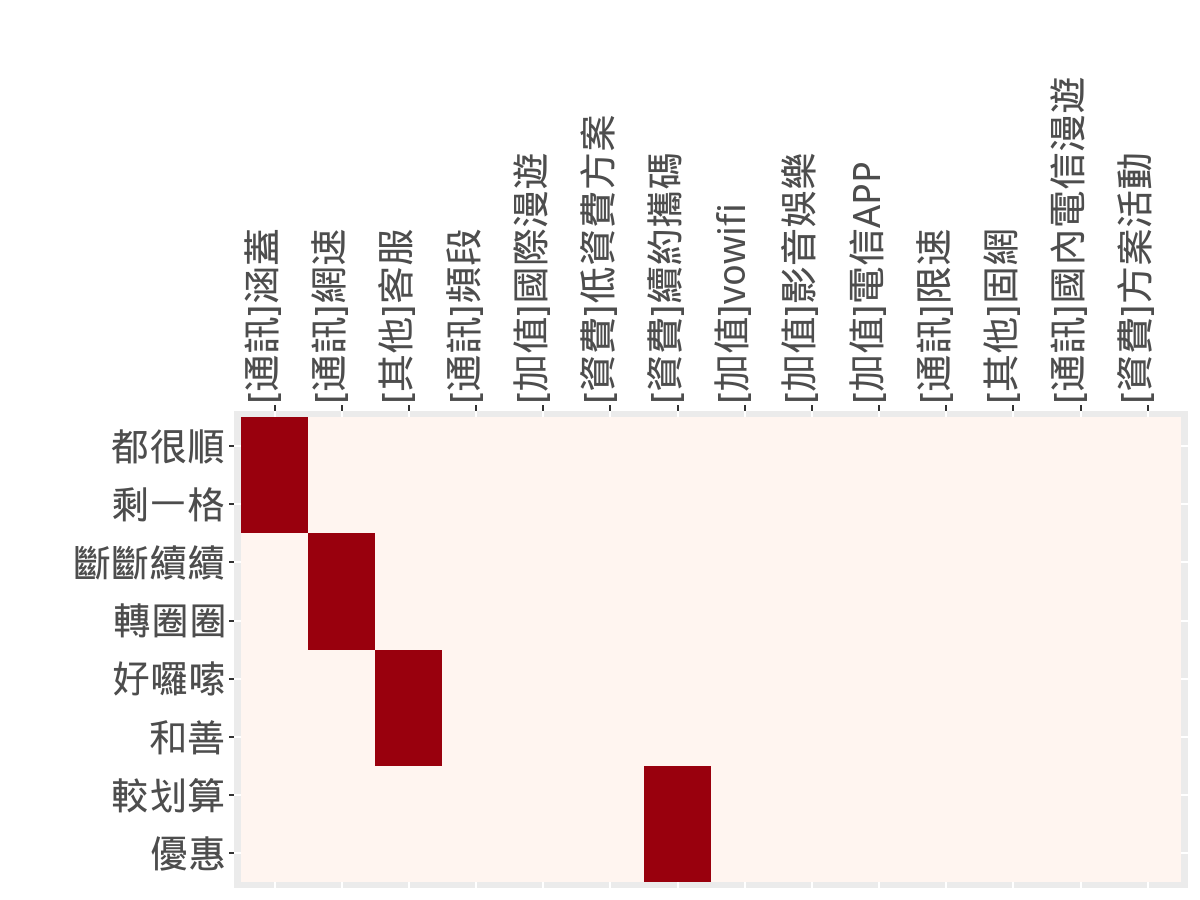

In [151]:
# png("h:/eval_onto_1.png", 800,800,res=150)
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=150)
tgt_idx = which(rownames(tab) %in% c("剩一格", "轉圈圈", "和善", "優惠"))
tgt_idx = sapply(tgt_idx, function(x){seq(x, x-1)})
tab2 = tab[tgt_idx, ]
# tab = tab[order(apply(tab, 1, function(x){min(which(x==0))})),]
# tab[tab==0] = 3
ggplot(as.data.frame(tab2), aes(x=attribute, y=candidate, fill=Freq)) + 
    geom_tile() +
    scale_fill_gradientn(colors=brewer.pal(8, 'Reds')) + 
    scale_x_discrete(position="top")+
    labs(x="", y="")+
    theme(text=element_text(size=36), 
          legend.position="none",
          axis.text.x=element_text(angle=90, hjust=0))
# dev.off()

In [154]:
c(nrow(tab), ncol(tab))

[1] 159  14

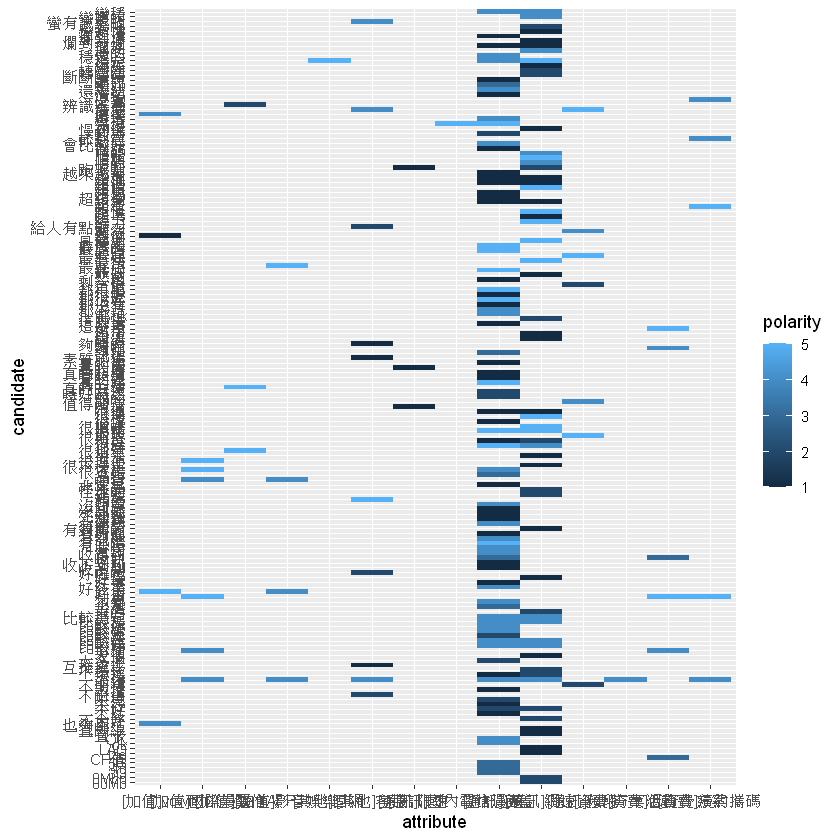

In [12]:
ggplot(data, aes(y=candidate, x=attribute, fill=polarity)) + geom_tile()